# Step 2 : Feature Creation / Feature Engineering

pada tahapan ini akan dilakukan pembentukan pembersihan data dan seleksi fitur

In [1]:
# melakukan import library
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_style("whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# melakukan load base dataset fifa setelah di lakukan peringkasan kolom
df_path = 'Data/dataset_fifa.csv'
df = pd.read_csv(df_path,';')
df.head()

,team_position,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,RW,94,94,87.0,92.0,92.0,96.0,39.0,66.0,NaN,...,75,96,33,37,26,6,11,15,14,8
1,LW,93,93,90.0,93.0,82.0,89.0,35.0,78.0,NaN,...,85,95,28,32,24,7,11,15,14,11
2,CAM,92,92,91.0,85.0,87.0,95.0,32.0,58.0,NaN,...,90,94,27,26,29,9,9,15,15,11
3,GK,91,93,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,11,68,27,12,18,87,92,78,90,89
4,LW,91,91,91.0,83.0,86.0,94.0,35.0,66.0,NaN,...,88,91,34,27,22,11,12,6,8,8


berdasarkan table diatas masih terdapat data NaN / NULL. Maka dari itu perlu kita cari tau kolom mana saja yang null.

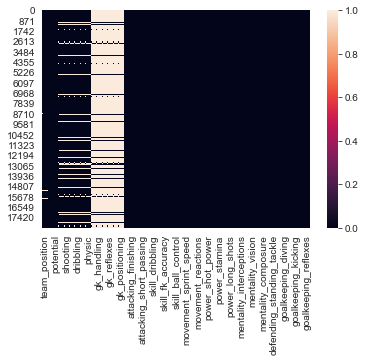

In [3]:
# mengecek data frame yang kosong dapat menggunakan heatmap
heatmap = sns.heatmap(df.isna())

berdasarkan heatmap diatas, berarti masih ada data yang null / NaN. dan perlu dilakukan Imputation.

In [4]:
# memisahkan team position from list ( karena data tersebut bukan numerical )
lists = df
lists = lists.drop(['team_position'], axis=1)

# mengisi data numerical dengan 0
lists = lists.fillna(0)
lists.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,94,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,...,75,96,33,37,26,6,11,15,14,8
1,93,93,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,...,85,95,28,32,24,7,11,15,14,11
2,92,92,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,...,90,94,27,26,29,9,9,15,15,11
3,91,93,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,...,11,68,27,12,18,87,92,78,90,89
4,91,91,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,...,88,91,34,27,22,11,12,6,8,8


Dikarenakan terdapat 2 jenis posisi utama yaitu Goal Keeper (GK) dan Player (selain GK). Maka dari itu dapat di asumsikan selain GK statistik NaN nya 0, dan sebaliknya. Maka dari itu dapat menggunakan metode **Numerical Imputation**.

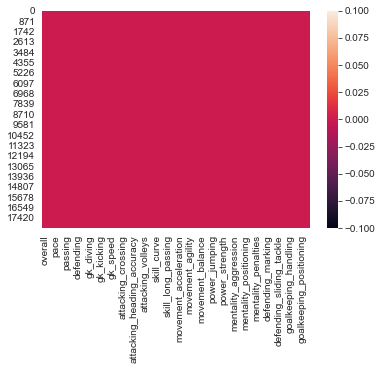

In [5]:
# dilakukan pengecekan ulang list null.
heatmap = sns.heatmap(lists.isna())

heatmap diatas menandakan tidak terdapat NaN/NULL data pada data frame diatas.

In [6]:
# memasukkan team_position kembali ke dalam lists
lists['team_position'] = df['team_position']
lists.tail()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position
18273,48,56,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,...,41,45,50,52,5,5,13,5,14,RES
18274,48,56,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,...,35,42,53,57,13,6,14,11,9,SUB
18275,48,56,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,...,39,46,52,46,7,8,10,6,14,SUB
18276,48,54,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,...,40,39,44,54,14,9,13,13,13,SUB
18277,48,51,60.0,32.0,51.0,45.0,47.0,55.0,0.0,0.0,...,42,52,42,48,8,12,14,9,10,SUB


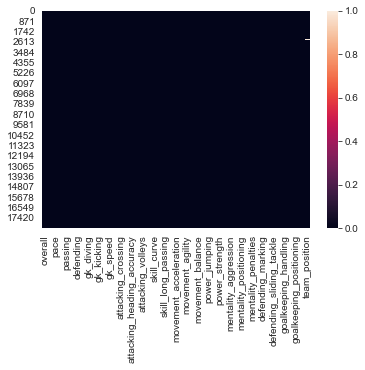

In [7]:
# lalu perlu kita cek ulang valuenya
heatmap = sns.heatmap(lists.isna())

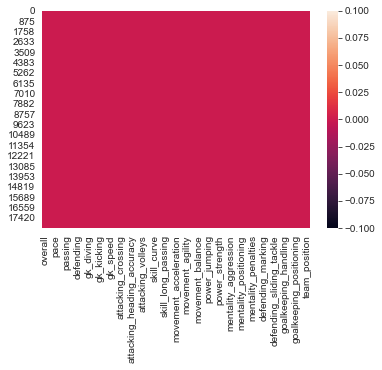

In [8]:
# Melakukan drop Row yang terdapat null.
lists = lists.dropna()

# Melakukan pengecekan ulang
heatmap = sns.heatmap(lists.isna())

grafik heatmap diatas menandakan tidak terdapat data null sama sekali di data frame tersebut. Setelah itu dapat dilakukan proses mapping pada kolom team position.

In [9]:
# Label mapping
position_codes = {
    'RW' : 0,    'LW' : 1,    'CAM' : 2,    'GK' : 3,    'RCM' : 4,
    'LCB' : 5,    'ST' : 6,    'CDM' : 7,    'LDM' : 8,    'RM' : 9,
    'RCB' : 10,    'LCM' : 11,    'LM' : 12,    'CF' : 13,    'SUB' : 14,
    'LB' : 15,    'LS' : 16,    'RB' : 17,    'RDM' : 18,    'RES' : 19,
    'RAM' : 20,    'RS' : 21,    'RF' : 22,    'CM' : 23,    'CB' : 24,
    'LF' : 25,    'LAM' : 26,    'RWB' : 27,    'LWB' : 28
}

# Category mapping
pos_df = lists
pos_df = pos_df.replace({'team_position':position_codes})
pos_df.tail()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position
18273,48,56,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,...,41,45,50,52,5,5,13,5,14,19
18274,48,56,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,...,35,42,53,57,13,6,14,11,9,14
18275,48,56,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,...,39,46,52,46,7,8,10,6,14,14
18276,48,54,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,...,40,39,44,54,14,9,13,13,13,14
18277,48,51,60.0,32.0,51.0,45.0,47.0,55.0,0.0,0.0,...,42,52,42,48,8,12,14,9,10,14


berdasarkan table diatas, kategori team_position telah berhasil dirubah  ke dalam bentuk numerical

In [10]:
pos_df.describe()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,team_position
count,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,...,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000,18038.000000
mean,66.205677,71.556215,60.210611,46.493680,50.876039,55.606830,45.807296,57.674687,7.230292,6.979266,...,58.501608,46.832520,47.629227,45.593747,16.507096,16.297428,16.157833,16.308072,16.654008,13.185109
std,6.954596,6.143669,23.764060,21.063682,20.456807,21.880759,22.372330,22.330193,20.659586,19.932862,...,11.856382,20.048509,21.554191,21.182693,17.655881,16.921975,16.549233,17.053043,17.963828,5.147408
min,48.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,62.000000,67.000000,57.000000,35.000000,46.000000,53.000000,31.000000,55.000000,0.000000,0.000000,...,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,11.000000
50%,66.000000,71.000000,67.000000,52.000000,56.000000,62.000000,52.000000,64.000000,0.000000,0.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,14.000000
75%,71.000000,75.000000,74.000000,62.000000,63.000000,69.000000,64.000000,71.000000,0.000000,0.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,16.000000
max,94.000000,95.000000,96.000000,93.000000,92.000000,96.000000,90.000000,90.000000,90.000000,92.000000,...,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000,28.000000


overall                      -0.289674
potential                    -0.105444
pace                          0.115953
shooting                      0.009765
passing                       0.036896
dribbling                     0.065097
defending                     0.058694
physic                        0.045144
gk_diving                    -0.147587
gk_handling                  -0.146117
gk_kicking                   -0.144846
gk_reflexes                  -0.148389
gk_speed                     -0.153133
gk_positioning               -0.150911
attacking_crossing            0.036471
attacking_finishing          -0.023108
attacking_heading_accuracy    0.015044
attacking_short_passing      -0.024293
attacking_volleys            -0.029558
skill_dribbling               0.040940
skill_curve                  -0.006764
skill_fk_accuracy            -0.044431
skill_long_passing           -0.050545
skill_ball_control            0.005446
movement_acceleration         0.060355
movement_sprint_speed    

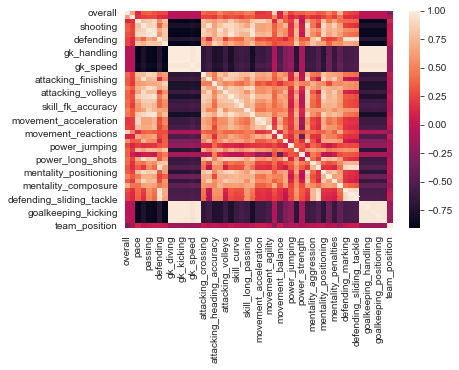

In [11]:
# melihat korealsi antara team_position dengan kolom lainnya.
heatmap = sns.heatmap(pos_df.corr())
print(pos_df.corr()['team_position'])

In [13]:
# divide feature to 2 variation
feature1_column = [
    "team_position","overall","potential","pace","shooting","passing","dribbling","defending","physic",
    "gk_diving","gk_handling","gk_kicking","gk_reflexes","gk_speed","gk_positioning"
]

feature2_column = [
    "team_position","overall","potential","attacking_crossing",
    "attacking_finishing","attacking_heading_accuracy","attacking_short_passing","attacking_volleys","skill_dribbling","skill_curve",
    "skill_fk_accuracy","skill_long_passing","skill_ball_control","movement_acceleration","movement_sprint_speed","movement_agility",
    "movement_reactions","movement_balance","power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots","mentality_aggression",
    "mentality_interceptions","mentality_positioning","mentality_vision","mentality_penalties","mentality_composure","defending_marking","defending_standing_tackle",
    "defending_sliding_tackle","goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking","goalkeeping_positioning", "goalkeeping_reflexes"
]

feature1_df = pos_df[feature1_column]
feature2_df = pos_df[feature2_column]

# membuat dataframe khusus untuk setiap posisi.
feature1_df_pos = feature1_df['team_position']
feature2_df_pos = feature2_df['team_position']

In [18]:
print(feature1_df.shape)
print("----------------------------")
print(feature1_df_pos.shape)
print("----------------------------")
print(feature2_df.shape)
print("----------------------------")
print(feature2_df_pos.shape)

(18038, 15)
----------------------------
(18038,)
----------------------------
(18038, 37)
----------------------------
(18038,)


In [20]:
# remove team position label
feature1_df.drop(['team_position'], axis=1)
feature2_df.drop(['team_position'], axis=1)

,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,94,88,95,70,92,88,97,93,94,...,75,96,33,37,26,6,11,15,14,8
1,93,93,84,94,89,83,87,89,81,76,...,85,95,28,32,24,7,11,15,14,11
2,92,92,87,87,62,87,87,96,88,87,...,90,94,27,26,29,9,9,15,15,11
3,91,93,13,11,15,43,13,12,13,14,...,11,68,27,12,18,87,92,78,90,89
4,91,91,81,84,61,89,83,95,83,79,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,48,56,21,17,40,35,27,24,23,21,...,39,41,45,50,52,5,5,13,5,14
18274,48,56,24,20,42,43,28,32,24,29,...,37,35,42,53,57,13,6,14,11,9
18275,48,56,32,33,49,53,32,40,32,32,...,36,39,46,52,46,7,8,10,6,14
18276,48,54,39,34,47,54,28,42,37,39,...,36,40,39,44,54,14,9,13,13,13


In [21]:
# Scaler all value using standar scaler
standar = StandardScaler()

feature1_df = pd.DataFrame(standar.fit_transform(feature1_df))
feature2_df = pd.DataFrame(standar.fit_transform(feature2_df))

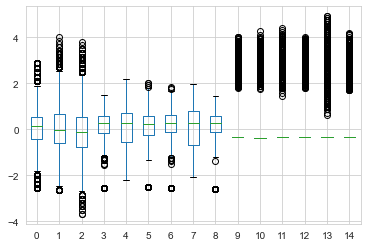

In [22]:
feature1_df.boxplot()

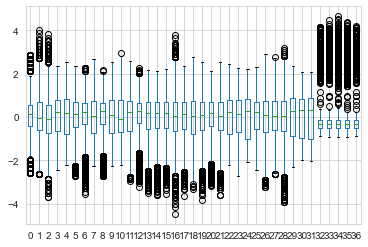

In [23]:
feature2_df.boxplot()

berdasarkan hasil grafik diatas, hasil dari scaling menggunakan standar scaler mempengaruhi outlier, dan menjadi lebih padat.

In [29]:
# Split Feature 1 to train and test
feature1_X_train, feature1_X_test, feature1_Y_train, feature1_Y_test = train_test_split(
    feature1_df, 
    feature1_df_pos, 
    test_size=0.15, 
    random_state=8)

print(feature1_X_train.shape)
print(feature1_X_test.shape)
print(feature1_Y_train.shape)
print(feature1_Y_test.shape)
print('-----------------------------------------')
print(feature1_X_train.tail())
print('-----------------------------------------')
print(feature1_X_test.tail())
print('-----------------------------------------')
print(feature1_Y_train.tail())
print('-----------------------------------------')
print(feature1_Y_test.tail())

(15332, 15)
(2706, 15)
(15332,)
(2706,)
-----------------------------------------
              0         1         2         3         4         5         6  \
5480  -0.230241  0.545600 -0.253311  0.369871  0.783661  0.885987  0.612115   
6995  -2.367298  0.258013 -0.416085  0.959012  0.451326  0.397139  0.840633   
10376  1.518261 -0.173369 -0.741632  0.622360  0.878613  0.250484  0.475004   
2181   1.129705  1.120775  1.211653  0.790686  0.736184  1.032641  0.840633   
4547  -0.230241  0.689394 -0.090537  1.127338  0.973566  0.885987  0.840633   

              7         8         9        10        11        12        13  \
5480   0.857901  0.686324 -0.349982 -0.350148 -0.349834 -0.349762 -0.338017   
6995  -0.840673  0.014569 -0.349982 -0.350148 -0.349834 -0.349762 -0.338017   
10376 -0.438379  0.372838 -0.349982 -0.350148 -0.349834 -0.349762 -0.338017   
2181   1.081397  0.551973 -0.349982 -0.350148 -0.349834 -0.349762 -0.338017   
4547  -0.393680 -0.388484 -0.349982 -0.350148 -0

In [30]:
# Split Feature 2 to train and test
feature2_X_train, feature2_X_test, feature2_Y_train, feature2_Y_test = train_test_split(
    feature2_df, 
    feature2_df_pos, 
    test_size=0.15, 
    random_state=8)

print(feature2_X_train.shape)
print(feature2_X_test.shape)
print(feature2_Y_train.shape)
print(feature2_Y_test.shape)
print('-----------------------------------------')
print(feature2_X_train.tail())
print('-----------------------------------------')
print(feature2_X_test.tail())
print('-----------------------------------------')
print(feature2_Y_train.tail())
print('-----------------------------------------')
print(feature2_Y_test.tail())

(15332, 37)
(2706, 37)
(15332,)
(2706,)
-----------------------------------------
             0         1         2         3         4         5         6   \
5480  -0.230241  0.545600 -0.253311  0.671100  0.582534  0.505547  0.767968   
6995  -2.367298  0.258013 -0.416085  0.725749  0.684757 -1.335130  0.563048   
10376  1.518261 -0.173369 -0.741632  0.288562  1.042537  0.332984 -0.051709   
2181   1.129705  1.120775  1.211653  1.436176  0.378088  1.023238  1.041193   
4547  -0.230241  0.689394 -0.090537  1.108287  1.144760 -1.162567  0.767968   

             7         8         9   ...        27        28        29  \
5480   1.029780  0.654738  0.633521  ...  0.868601  0.716798  0.606919   
6995   0.407056  0.919335 -0.399270  ... -0.534006 -0.464034 -1.089015   
10376  0.803335  0.443061  0.633521  ...  0.996111  0.379417 -0.590211   
2181   0.633501  0.919335  1.340167  ... -0.534006  0.463762  1.105723   
4547   0.180611  0.919335  1.611955  ...  1.314885  0.379417  0.606919   

In [28]:
# menyimpan feature ke folder Data
feature1_df.to_csv("Data/feature1_fifa.csv", sep=';',index=False, encoding='utf-8')
feature1_X_train.to_csv("Data/feature1_X_train.csv", sep=';',index=False, encoding='utf-8')
feature1_X_test.to_csv("Data/feature1_X_test.csv", sep=';',index=False, encoding='utf-8')
feature1_Y_train.to_csv("Data/feature1_Y_train.csv", sep=';',index=False, encoding='utf-8')
feature1_Y_test.to_csv("Data/feature1_Y_test.csv", sep=';',index=False, encoding='utf-8')

feature2_df.to_csv("Data/feature2_fifa.csv", sep=';',index=False, encoding='utf-8')
feature2_X_train.to_csv("Data/feature2_X_train.csv", sep=';',index=False, encoding='utf-8')
feature2_X_test.to_csv("Data/feature2_X_test.csv", sep=';',index=False, encoding='utf-8')
feature2_Y_train.to_csv("Data/feature2_Y_train.csv", sep=';',index=False, encoding='utf-8')
feature2_Y_test.to_csv("Data/feature2_Y_test.csv", sep=';',index=False, encoding='utf-8')

